In [71]:
import pandas as pd
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('validated_data.csv')
df.head()

,Product_ID,Product_Name,Calories,Carbs,Sugars,Fat,Protein,Sodium,Serving_Size,Health_Condition,Height,Weight,Age,BMI,Activity_Level,Blood_Sugar_Level,Blood_Pressure,Health_Compatibility_Score,Health_Risk
0,P16601,bring Product,289.56,49.71,22.12,19.29,18.38,1460.70,214.09,Diabetic,170.63,57.14,50,19.625894,High,174.127264,104.386695,41.185211,High
1,P27319,reason Product,247.07,49.49,19.57,35.00,8.48,195.36,178.19,Obese,166.86,94.59,74,33.973536,Medium,119.959580,150.729833,49.392329,High
2,P20205,wall Product,209.52,68.09,15.72,27.70,15.92,1043.50,128.07,Heart Disease,164.64,47.37,71,17.475623,High,96.220791,137.230824,77.661754,Low
3,P78943,general Product,217.64,46.73,17.72,9.15,19.40,931.10,160.60,Diabetic,178.02,55.07,40,17.377107,Medium,203.874283,101.538758,58.170785,Medium
4,P77959,north Product,172.89,51.32,18.41,10.63,24.06,945.32,115.60,Heart Disease,179.98,50.96,69,15.731891,Medium,93.636305,164.162647,85.794018,Low


In [73]:
df = df.drop(columns=['Product_ID', 'Product_Name'])
df.head()

,Calories,Carbs,Sugars,Fat,Protein,Sodium,Serving_Size,Health_Condition,Height,Weight,Age,BMI,Activity_Level,Blood_Sugar_Level,Blood_Pressure,Health_Compatibility_Score,Health_Risk
0,289.56,49.71,22.12,19.29,18.38,1460.70,214.09,Diabetic,170.63,57.14,50,19.625894,High,174.127264,104.386695,41.185211,High
1,247.07,49.49,19.57,35.00,8.48,195.36,178.19,Obese,166.86,94.59,74,33.973536,Medium,119.959580,150.729833,49.392329,High
2,209.52,68.09,15.72,27.70,15.92,1043.50,128.07,Heart Disease,164.64,47.37,71,17.475623,High,96.220791,137.230824,77.661754,Low
3,217.64,46.73,17.72,9.15,19.40,931.10,160.60,Diabetic,178.02,55.07,40,17.377107,Medium,203.874283,101.538758,58.170785,Medium
4,172.89,51.32,18.41,10.63,24.06,945.32,115.60,Heart Disease,179.98,50.96,69,15.731891,Medium,93.636305,164.162647,85.794018,Low


In [74]:
df['Health_Condition'].unique()

array(['Diabetic', 'Obese', 'Heart Disease', 'Healthy', 'Hypertension'],
      dtype=object)

In [75]:
df['Health_Condition'] = df['Health_Condition'].map({'Diabetic': 0, 'Obese': 1, 'Heart Disease': 2, 'Healthy': 3, 'Hypertension': 4})

In [76]:
df['Activity_Level'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [77]:
df['Activity_Level'] = df['Activity_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [78]:
df['Health_Risk'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [79]:
df['Health_Risk'] = df['Health_Risk'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [80]:
df.head()

,Calories,Carbs,Sugars,Fat,Protein,Sodium,Serving_Size,Health_Condition,Height,Weight,Age,BMI,Activity_Level,Blood_Sugar_Level,Blood_Pressure,Health_Compatibility_Score,Health_Risk
0,289.56,49.71,22.12,19.29,18.38,1460.70,214.09,0,170.63,57.14,50,19.625894,2,174.127264,104.386695,41.185211,2
1,247.07,49.49,19.57,35.00,8.48,195.36,178.19,1,166.86,94.59,74,33.973536,1,119.959580,150.729833,49.392329,2
2,209.52,68.09,15.72,27.70,15.92,1043.50,128.07,2,164.64,47.37,71,17.475623,2,96.220791,137.230824,77.661754,0
3,217.64,46.73,17.72,9.15,19.40,931.10,160.60,0,178.02,55.07,40,17.377107,1,203.874283,101.538758,58.170785,1
4,172.89,51.32,18.41,10.63,24.06,945.32,115.60,2,179.98,50.96,69,15.731891,1,93.636305,164.162647,85.794018,0


In [81]:
df.shape

(44440, 17)

In [82]:
X = df.drop(columns=['Health_Risk'], axis=1)
y = df['Health_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [84]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [85]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100
)

Epoch 1/100
1111/1111 [==============================] - 2s 2ms/step - loss: 2.9474 - accuracy: 0.6937 - val_loss: 0.3723 - val_accuracy: 0.8580
Epoch 2/100
1111/1111 [==============================] - 2s 1ms/step - loss: 0.3120 - accuracy: 0.8722 - val_loss: 0.4156 - val_accuracy: 0.8493
Epoch 3/100
1111/1111 [==============================] - 1s 1ms/step - loss: 0.2324 - accuracy: 0.9043 - val_loss: 0.4220 - val_accuracy: 0.8510
Epoch 4/100
1111/1111 [==============================] - 2s 2ms/step - loss: 0.2321 - accuracy: 0.9091 - val_loss: 0.1938 - val_accuracy: 0.9191
Epoch 5/100
1111/1111 [==============================] - 1s 1ms/step - loss: 0.2184 - accuracy: 0.9163 - val_loss: 0.1507 - val_accuracy: 0.9389
Epoch 6/100
1111/1111 [==============================] - 1s 1ms/step - loss: 0.1967 - accuracy: 0.9239 - val_loss: 0.1400 - val_accuracy: 0.9406
Epoch 7/100
1111/1111 [==============================] - 1s 1ms/step - loss: 0.1911 - accuracy: 0.9243 - val_loss: 0.1985 - val_ac

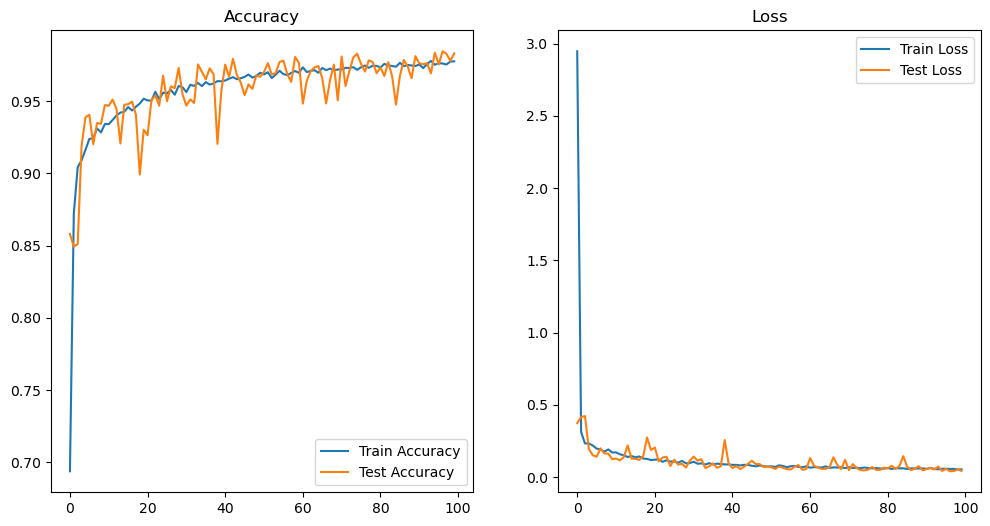

In [86]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [87]:
model.evaluate(X_test, y_test)

278/278 [==============================] - 0s 952us/step - loss: 0.0429 - accuracy: 0.9831


[0.04293157905340195, 0.9831233024597168]

278/278 [==============================] - 0s 771us/step
Accuracy: 0.9831233123312331

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       600
           1       0.98      0.99      0.98      4877
           2       0.99      0.99      0.99      3411

    accuracy                           0.98      8888
   macro avg       0.98      0.96      0.97      8888
weighted avg       0.98      0.98      0.98      8888



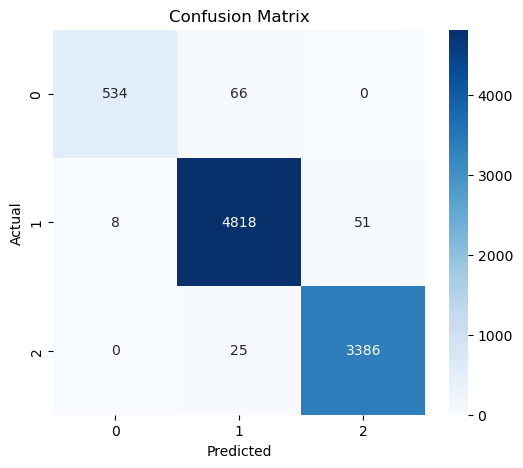

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if y_test.ndim > 1:  
    y_test = np.argmax(y_test, axis=1) 

y_pred = model.predict(X_test)

if y_pred.ndim > 1:  
    y_pred = np.argmax(y_pred, axis=1) 

cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", cr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [107]:
health_compatibility_model = tf.keras.models.load_model('models/health_compatibility.h5')

In [ ]:
user_data = {
    'Calories': [289.56],
    'Carbs': [49.71],
    'Sugars': [22.12],
    'Fat': [19.29],
    'Protein': [18.38],
    'Sodium': [1460.70],
    'Serving_Size': [214.09],
    'Health_Condition': ['0'], 
    'Height': [170.63],
    'Weight': [57.14],
    'Age': [50],
    'BMI': [19.625894],
    'Activity_Level': [2],  
    'Blood_Sugar_Level': [174.127264],
    'Blood_Pressure': [104.386695],
    'Health_Compatibility_Score': 0 
}

user_df = pd.DataFrame(user_data)

health_compatibility_feature = user_df.drop(columns=['Health_Compatibility_Score'])
user_df['Health_Compatibility_Score'] = health_compatibility_model.predict(health_compatibility_feature.astype(float))

user_df['Health_Condition'] = user_df['Health_Condition'].astype(int)
health_conditions_map = {0: 'Diabetic', 1: 'Obese', 2: 'Heart Disease', 3: 'Healthy', 4: 'Hypertension'}

health_risk = model.predict(user_df).argmax(axis=1)[0]
health_condition = user_df['Health_Condition'].values[0]
health_condition = health_conditions_map[health_condition]
bmi = user_df['BMI'].values[0]
blood_pressure = user_df['Blood_Pressure'].values[0]

print("Health Risk Prediction:", health_risk)
print("Health Condition:", health_condition)
print("BMI:", bmi)
print("Blood Pressure:", blood_pressure)

def map_risk_to_causes_and_recommendations(health_risk, health_conditions, bmi, blood_pressure):
    if blood_pressure < 120:
        blood_pressure_status = "Normal"
    elif 120 <= blood_pressure < 130:
        blood_pressure_status = "Elevated"
    elif 130 <= blood_pressure < 140:
        blood_pressure_status = "Hypertension Stage 1"
    else:
        blood_pressure_status = "Hypertension Stage 2"

    if health_risk == 0:
        causes = "Healthy Lifestyle"
        recommendations = ["Fitness Gear", "Healthy Food Products", "Vitamins"]
    
    elif health_risk == 1:
        if 'Hypertension' in health_conditions or blood_pressure_status in ["Hypertension Stage 1", "Hypertension Stage 2"] or bmi > 25:
            causes = "Hypertension, Overweight"
            recommendations = ["Blood Pressure Monitors", "Low-Sodium Foods", "Workout Gear"]
        else:
            causes = "Slightly Overweight"
            recommendations = ["Health Tracking Apps", "Low-Calorie Snacks"]
    
    elif health_risk == 2:
        if 'Diabetic' in health_conditions or bmi > 30 or blood_pressure_status in ["Hypertension Stage 1", "Hypertension Stage 2"]:
            causes = "Diabetes, Obesity, Hypertension"
            recommendations = ["Low-Carb Foods", "Diabetic-Friendly Snacks", "Weight Management Tools"]
        elif 'Hypertension' in health_conditions or blood_pressure_status in ["Hypertension Stage 1", "Hypertension Stage 2"]:
            causes = "Hypertension"
            recommendations = ["Heart-Healthy Foods", "Medications for Hypertension", "Blood Pressure Monitors"]
        else:
            causes = "Obesity"
            recommendations = ["Exercise Equipment", "Weight Loss Supplements"]
    
    return causes, recommendations

causes, recommendations = zip(*df.apply(lambda x: map_risk_to_causes_and_recommendations(
    health_risk=health_risk, health_conditions=health_condition, bmi=bmi, blood_pressure=blood_pressure), axis=1)
)

1/1 [==============================] - 0s 33ms/step
Health Risk Prediction: 1
Health Condition: Diabetic
BMI: 19.625894
Blood Pressure: 104.386695


In [126]:
result = pd.DataFrame({
    'Causes': causes,
    'Recommendations': [", ".join(i) for i in recommendations]
})

result.head(1)

,Causes,Recommendations
0,Slightly Overweight,"Health Tracking Apps, Low-Calorie Snacks"


In [127]:
model.save('models/health_risk.h5')